In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')


## Przygotowanie danych

In [2]:
df = pd.read_csv('weather.csv')
df.shape

(366, 24)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           366 non-null    object 
 1   Location       366 non-null    object 
 2   MinTemp        366 non-null    float64
 3   MaxTemp        366 non-null    float64
 4   Rainfall       366 non-null    float64
 5   Evaporation    366 non-null    float64
 6   Sunshine       363 non-null    float64
 7   WindGustDir    363 non-null    object 
 8   WindGustSpeed  364 non-null    float64
 9   WindDir9am     335 non-null    object 
 10  WindDir3pm     365 non-null    object 
 11  WindSpeed9am   359 non-null    float64
 12  WindSpeed3pm   366 non-null    int64  
 13  Humidity9am    366 non-null    int64  
 14  Humidity3pm    366 non-null    int64  
 15  Pressure9am    366 non-null    float64
 16  Pressure3pm    366 non-null    float64
 17  Cloud9am       366 non-null    int64  
 18  Cloud3pm  

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [5]:
df.drop(['RainToday', 'RISK_MM'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


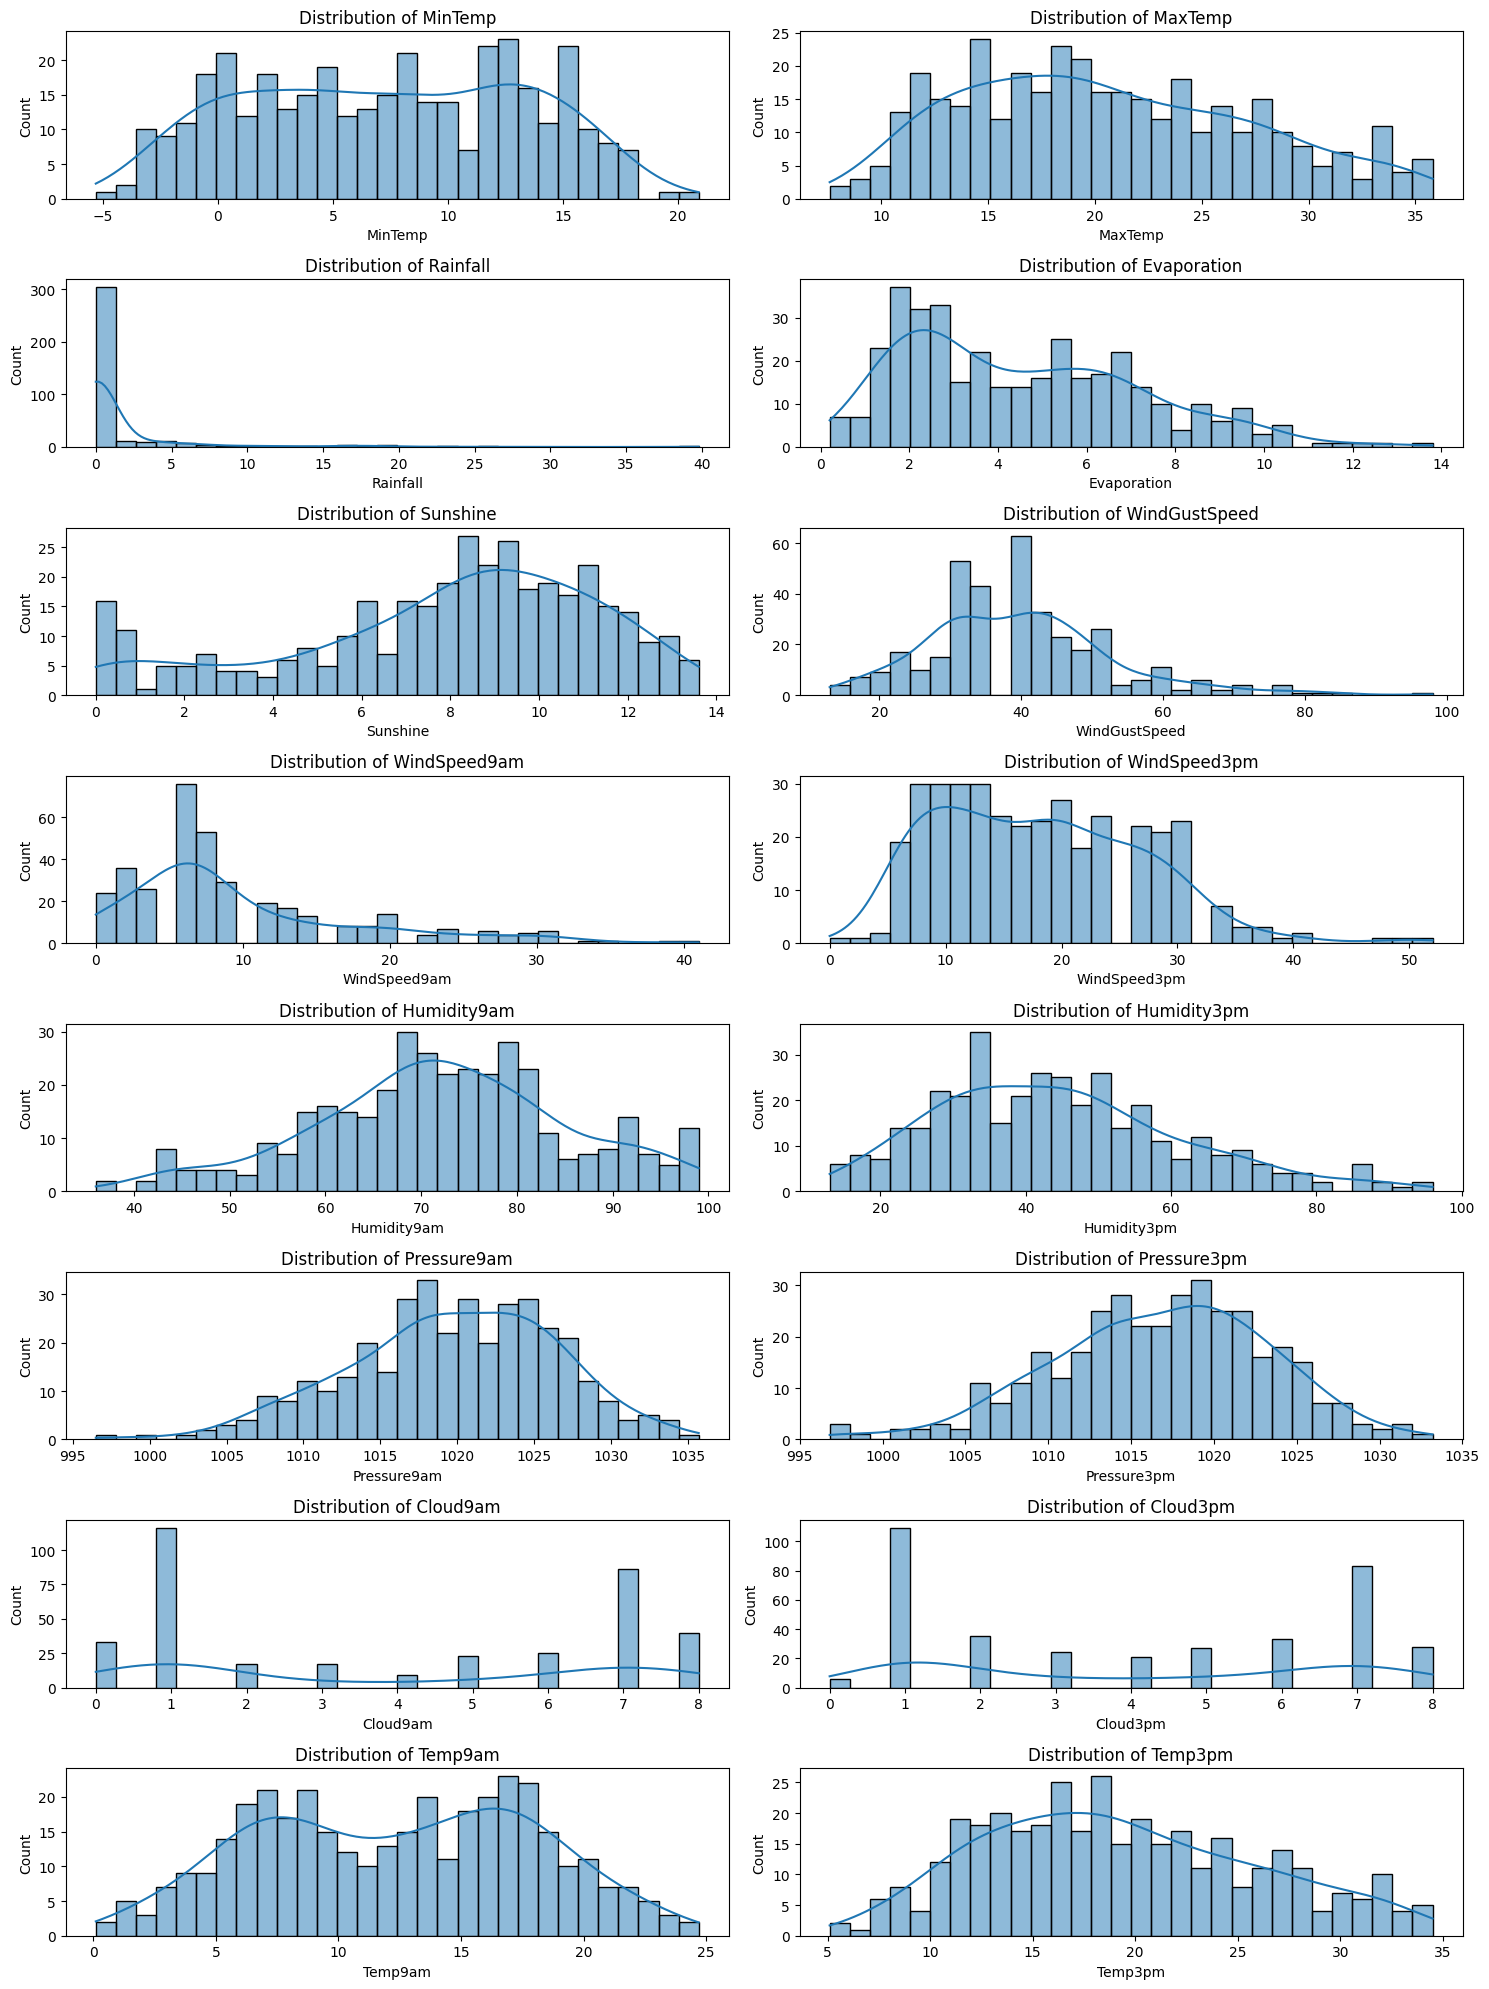

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_cols)//2, ncols=2, figsize=(15, 20))
for i, column in enumerate(numeric_cols):
    row_idx = i // 2
    col_idx = i % 2
    sns.histplot(df[column], kde=True, ax=axes[row_idx, col_idx], bins=30)
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


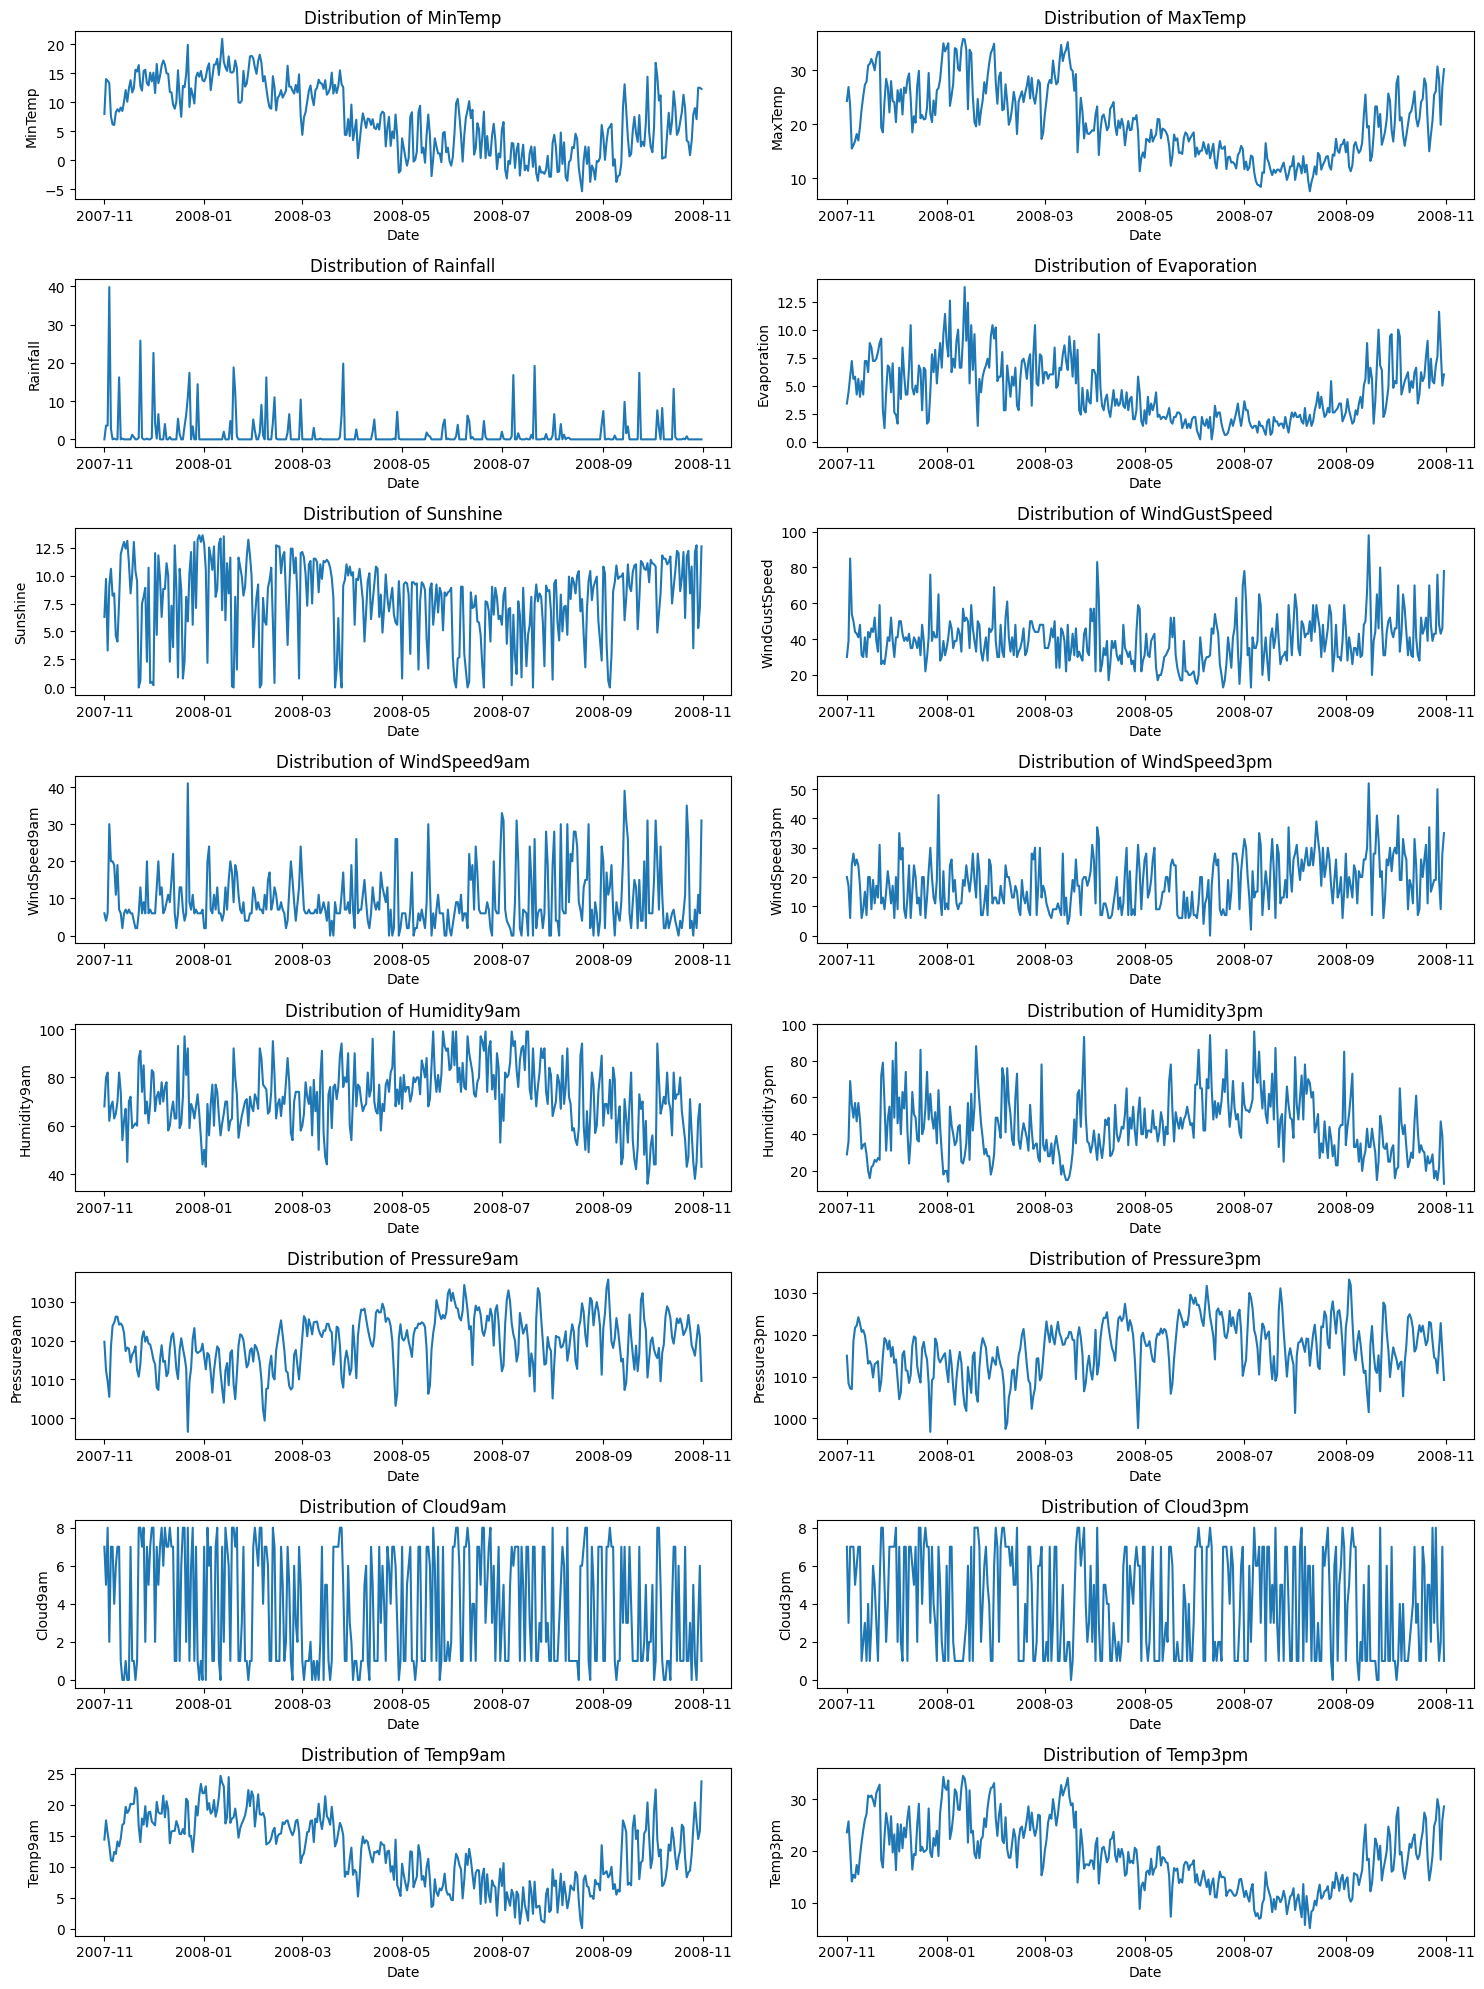

In [7]:
#line plot
numeric_cols = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_cols)//2, ncols=2, figsize=(15, 20))
for i, column in enumerate(numeric_cols):
    row_idx = i // 2
    col_idx = i % 2
    sns.lineplot(x=df['Date'], y=df[column], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [8]:
missing_values = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Column Type': df.dtypes
})

columns_with_missing_values = missing_values[missing_values['Missing Values'] > 0]

columns_with_missing_values

,Missing Values,Column Type
Sunshine,3,float64
WindGustDir,3,object
WindGustSpeed,2,float64
WindDir9am,31,object
WindDir3pm,1,object
WindSpeed9am,7,float64


In [9]:
# filling missing values
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace=True)



In [10]:
df.drop(['Date', 'Location'], axis=1, inplace=True)

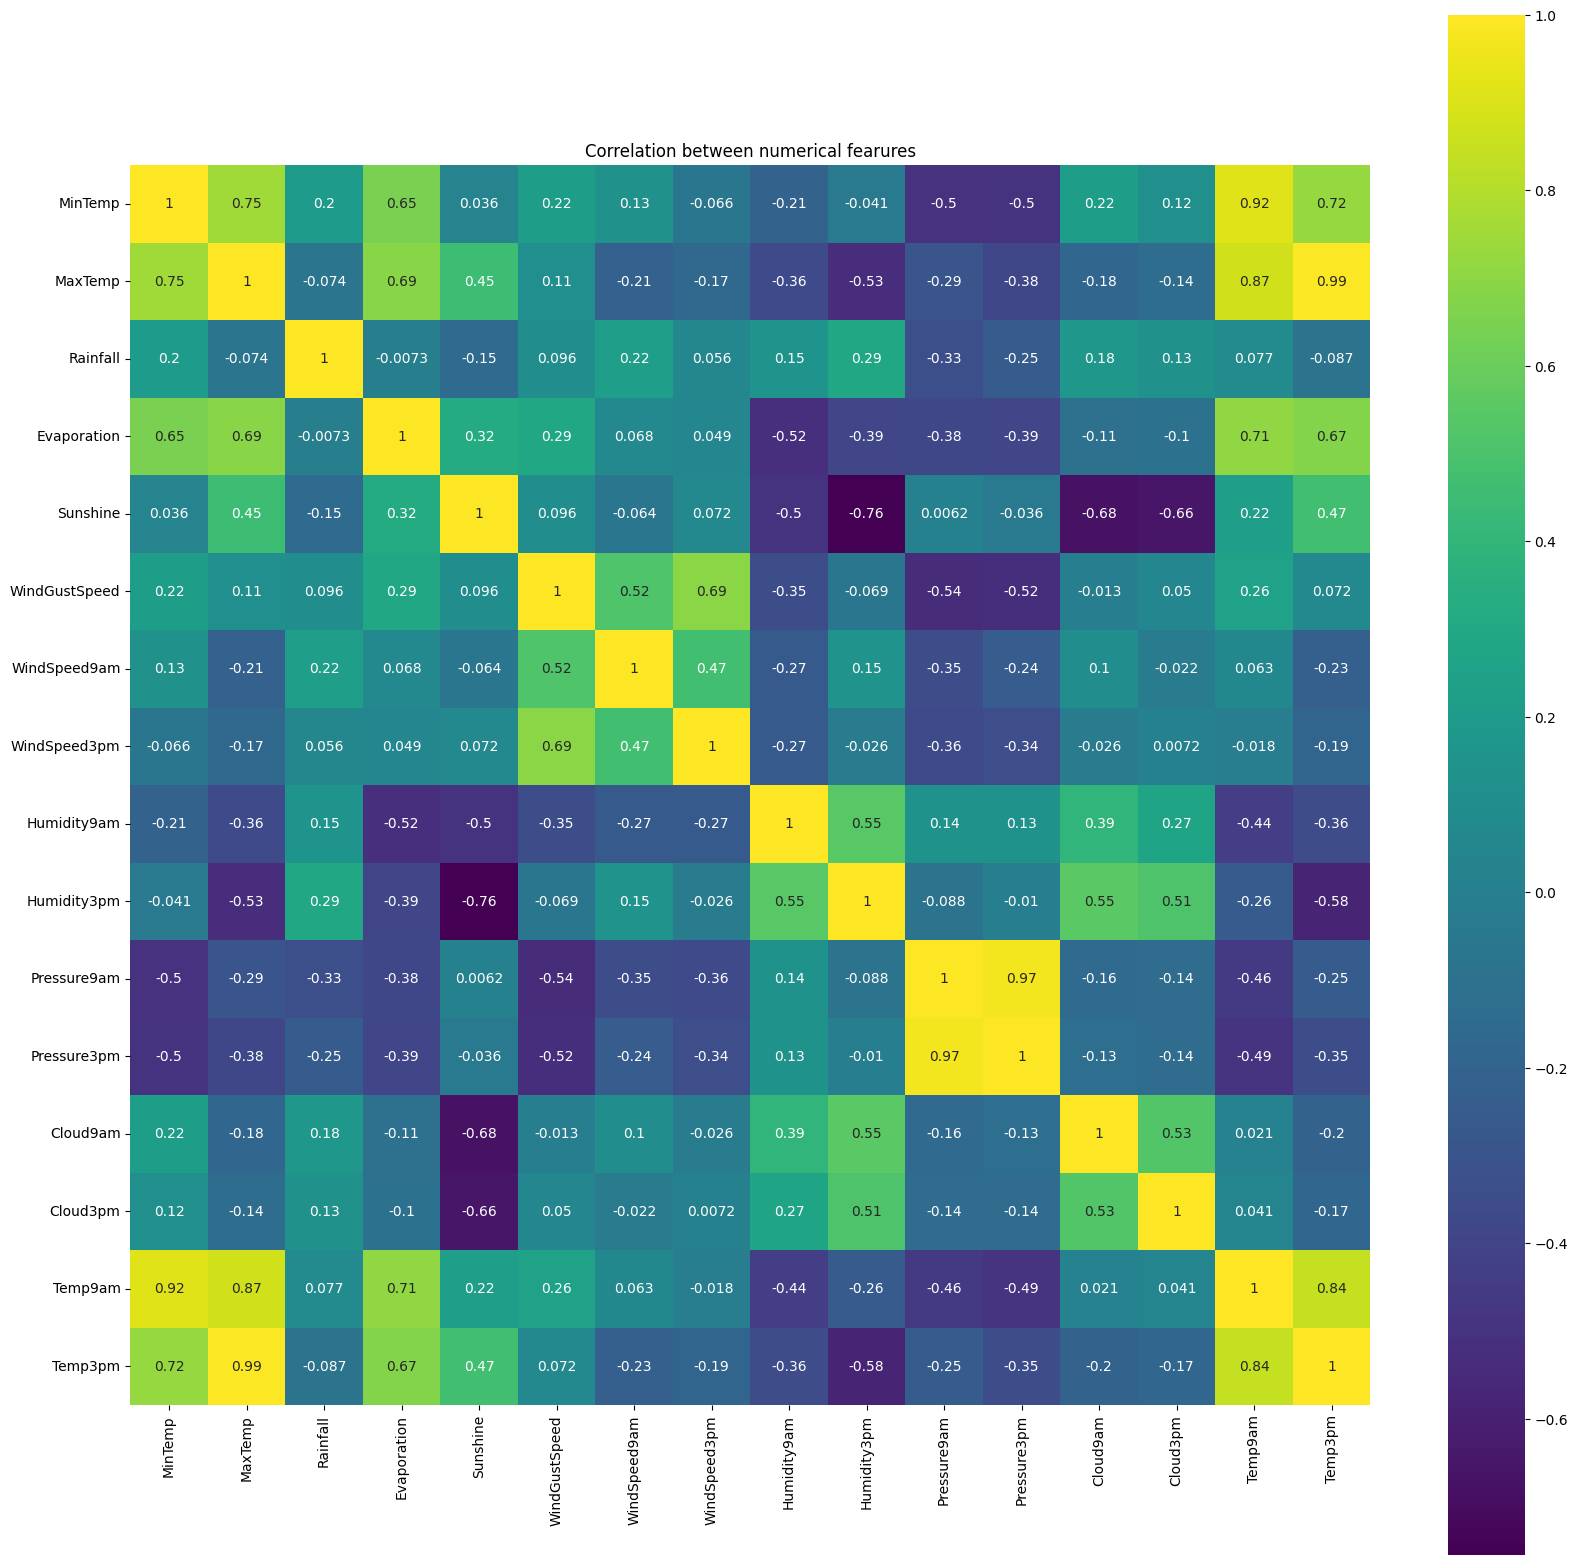

In [11]:
# correlation
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between numerical fearures')
plt.show()

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_cols].nunique()

WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainTomorrow     2
dtype: int64

In [13]:
print(df['RainTomorrow'].unique())

['Yes' 'No']


In [14]:
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
categorical_cols.remove('RainTomorrow')

In [15]:
encoder = OneHotEncoder()
encoded =encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded.drop(categorical_cols, axis=1, inplace=True)


In [16]:
numerical_cols = df.select_dtypes(include=['number']).columns

df_standarized = df_encoded.copy()
scaler = MinMaxScaler()
df_standarized[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [17]:
x = df_standarized.drop(['RainTomorrow'], axis=1)
y = df_standarized['RainTomorrow']

In [18]:
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((245, 64), (245,), (121, 64), (121,))

## Klasyfikatory

### Regresja logistyczna

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, x_test)
y_pred = logistic_regression.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.859504132231405


### Drzewa decyzyjne

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, x_test)
y_pred_clf = clf.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_clf))


Accuracy:  0.8099173553719008


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, x_test)
y_pred_rfc = rfc.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_rfc))

Accuracy:  0.8512396694214877


### Support Vector Machines

In [22]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, x_test)
y_pred_svc = svc.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_svc))

Accuracy:  0.8512396694214877


In [23]:
### K-Nearest Neighbors (KNN)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, x_test)
y_pred_knn = knn.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))

Accuracy:  0.8181818181818182


### Gaussian Naive Bayes (Naiwny klasyfikator bayesowski)

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, x_test)
y_pred_nb = nb.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_nb))

Accuracy:  0.34710743801652894


### XGBClassifier

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, x_test)
y_pred_xgb = xgb.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_xgb))

Accuracy:  0.8264462809917356


### CatBoostClassifier

In [27]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(x_train, x_test)
y_pred_cat = cat.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_cat))

Learning rate set to 0.005651
0:	learn: 0.6885012	total: 49.5ms	remaining: 49.5s
1:	learn: 0.6828128	total: 50.4ms	remaining: 25.2s
2:	learn: 0.6772456	total: 51.3ms	remaining: 17.1s
3:	learn: 0.6741191	total: 51.7ms	remaining: 12.9s
4:	learn: 0.6702382	total: 52.5ms	remaining: 10.4s
5:	learn: 0.6651589	total: 53.3ms	remaining: 8.83s
6:	learn: 0.6599847	total: 54.1ms	remaining: 7.68s
7:	learn: 0.6557593	total: 54.7ms	remaining: 6.78s
8:	learn: 0.6515294	total: 55.5ms	remaining: 6.11s
9:	learn: 0.6478028	total: 56.3ms	remaining: 5.58s
10:	learn: 0.6432608	total: 57.2ms	remaining: 5.14s
11:	learn: 0.6394780	total: 58ms	remaining: 4.78s
12:	learn: 0.6351483	total: 59ms	remaining: 4.48s
13:	learn: 0.6308258	total: 59.9ms	remaining: 4.22s
14:	learn: 0.6253517	total: 60.6ms	remaining: 3.98s
15:	learn: 0.6212914	total: 61.2ms	remaining: 3.77s
16:	learn: 0.6166736	total: 62.1ms	remaining: 3.59s
17:	learn: 0.6129419	total: 62.9ms	remaining: 3.43s
18:	learn: 0.6087029	total: 63.6ms	remaining: 3.

### AdaBoostClassifier Adeline

In [28]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, x_test)
y_pred_ada = ada.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_ada))

Accuracy:  0.8264462809917356


### Gradient Boosting Classifier

In [29]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, x_test)
y_pred_gb = gb.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_gb))

Accuracy:  0.8181818181818182


### Gaussian Process Classifier

In [30]:
# Guassian Process
from sklearn.gaussian_process import GaussianProcessClassifier
gp = GaussianProcessClassifier()
gp.fit(x_train, x_test)
y_pred_gp = gp.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_gp))

Accuracy:  0.8264462809917356


### MLPClassifier - Multi-layer Perceptron classifier

In [31]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(x_train, x_test)
y_pred_nn = nn.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_nn))

Accuracy:  0.8347107438016529


### Perceptron

In [32]:
from sklearn.linear_model import Perceptron
per = Perceptron()
per.fit(x_train, x_test)
y_pred_per = per.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_per))

Accuracy:  0.7520661157024794


### SGDClassifier

In [33]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, x_test)
y_pred_sgd = sgd.predict(y_train)
print('Accuracy: ', accuracy_score(y_test, y_pred_sgd))

Accuracy:  0.8347107438016529


## Porównanie klasyfikatorów

In [34]:
classifiers = [
    {'LogisticRegression': logistic_regression, 'y': y_pred},
    {'DecisionTreeClassifier': clf, 'y': y_pred_clf},
    {'RandomForestClassifier': rfc, 'y': y_pred_rfc},
    {'SVC': svc, 'y': y_pred_svc},
    {'KNeighborsClassifier': knn, 'y': y_pred_knn},
    {'GaussianNB': nb, 'y': y_pred_nb},
    {'XGBClassifier': xgb, 'y': y_pred_xgb},
    {'CatBoostClassifier': cat, 'y': y_pred_cat},
    {'AdaBoostClassifier': ada, 'y': y_pred_ada},
    {'GradientBoostingClassifier': gb, 'y': y_pred_gb},
    {'GaussianProcessClassifier': gp, 'y': y_pred_gp},
    {'MLPClassifier': nn, 'y': y_pred_nn},
    {'Perceptron': per, 'y': y_pred_per},
    {'SGDClassifier': sgd, 'y': y_pred_sgd}
]

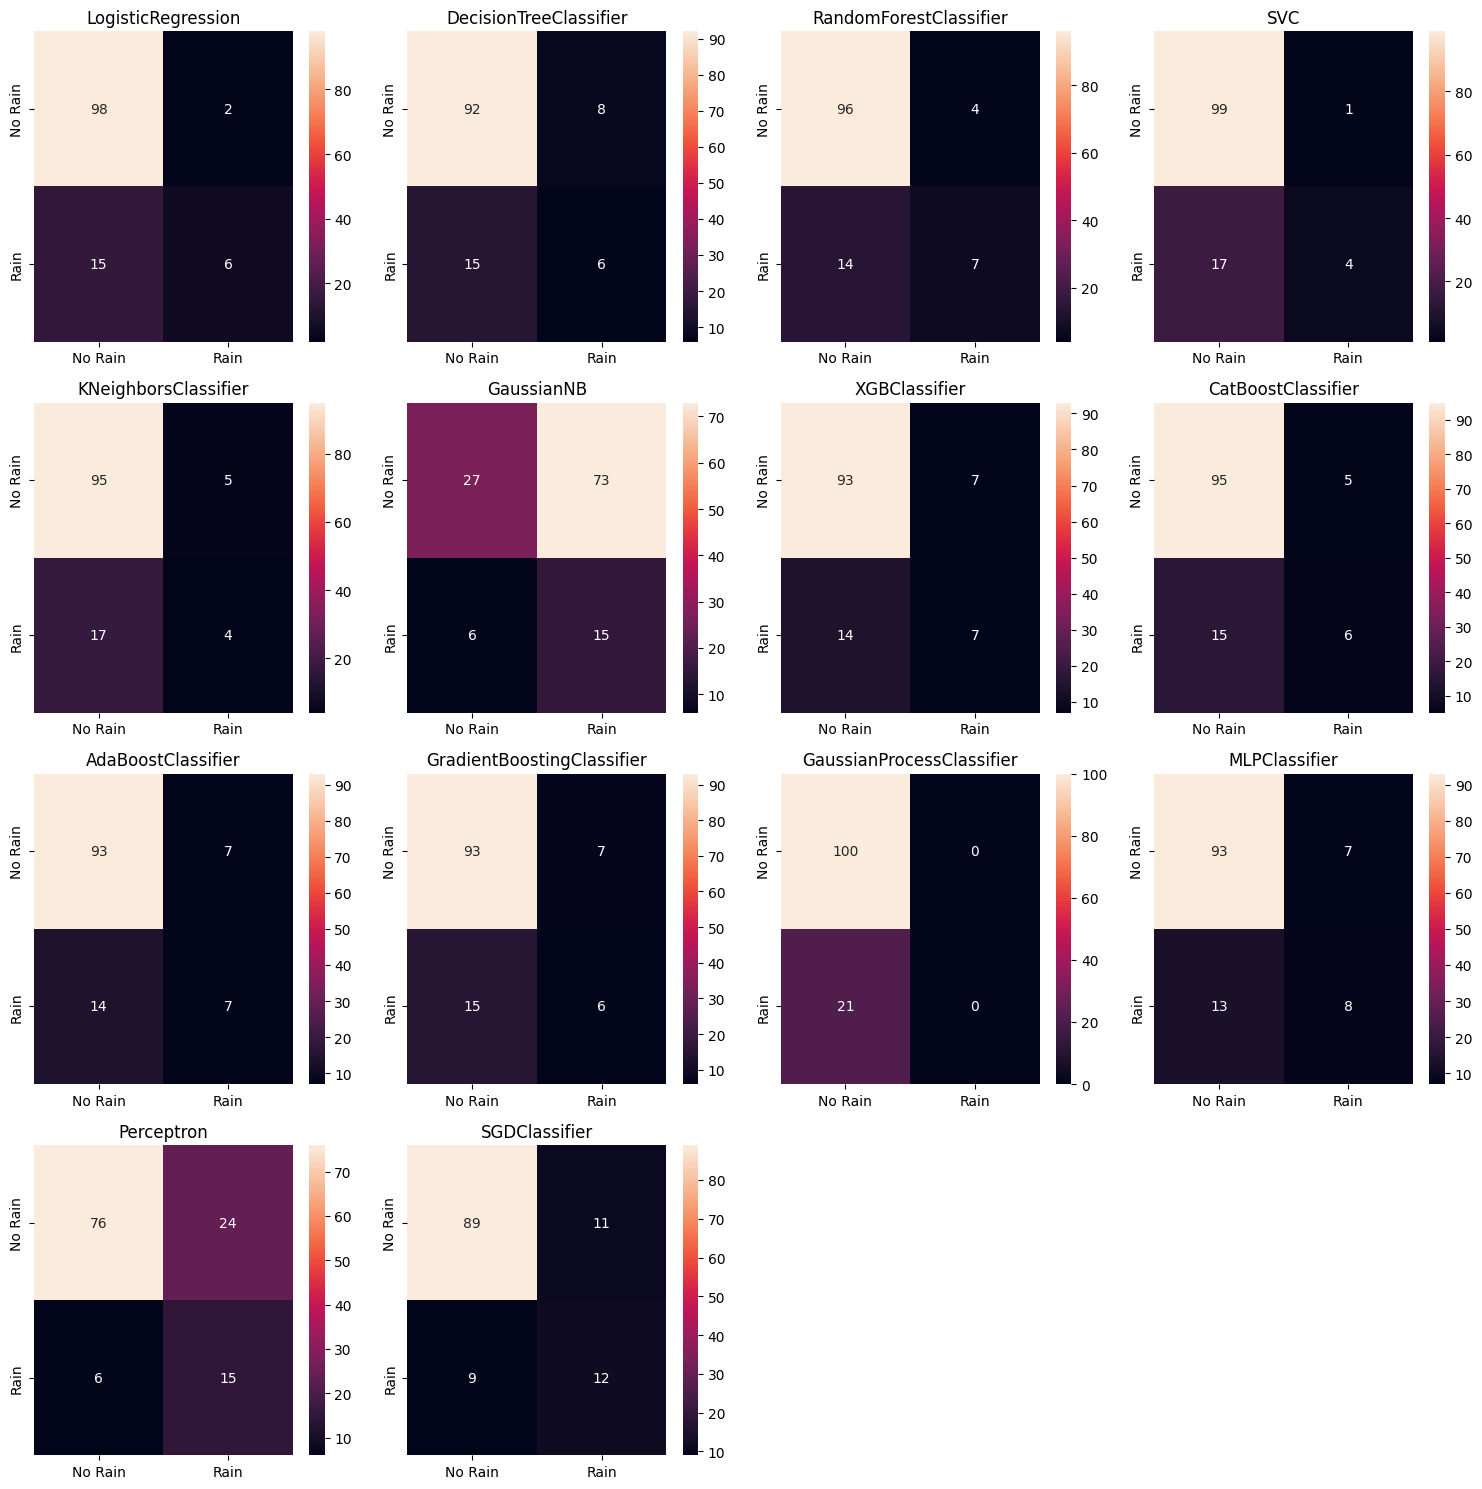

In [35]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15),squeeze=False)
for i, classifier in enumerate(classifiers):
    row_idx = i // 4
    col_idx = i % 4
    cm = confusion_matrix(y_test, classifier['y'])

    sns.heatmap(cm, annot=True, fmt='g', ax=axes[row_idx, col_idx], xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
    axes[row_idx, col_idx].set_title(list(classifier.keys())[0])
for i in range(len(classifiers), 16):
    row_idx = i // 4
    col_idx = i % 4
    fig.delaxes(axes[row_idx, col_idx])
plt.tight_layout()
plt.show()



In [36]:

reports = []
for classifier in classifiers:
    report = pd.DataFrame(classification_report(y_test, classifier['y'], output_dict=True))
    reports.append(report)
reports = pd.concat(reports, keys=[list(classifier.keys())[0] for classifier in classifiers])
reports


0.0        1.0  accuracy  \
LogisticRegression         precision    0.867257   0.750000  0.859504   
                           recall       0.980000   0.285714  0.859504   
                           f1-score     0.920188   0.413793  0.859504   
                           support    100.000000  21.000000  0.859504   
DecisionTreeClassifier     precision    0.859813   0.428571  0.809917   
                           recall       0.920000   0.285714  0.809917   
                           f1-score     0.888889   0.342857  0.809917   
                           support    100.000000  21.000000  0.809917   
RandomForestClassifier     precision    0.872727   0.636364  0.851240   
                           recall       0.960000   0.333333  0.851240   
                           f1-score     0.914286   0.437500  0.851240   
                           support    100.000000  21.000000  0.851240   
SVC                        precision    0.853448   0.800000  0.851240   
                           recall       0.990000   0.190476  0.851240   
                           f1-score     0.916667   0.307692  0.851240   
                           support    100.000000  21.000000  0.851240   
KNeighborsClassifier       precision    0.848214   0.444444  0.818182   
                           recall       0.950000   0.190476  0.818182   
                           f1-score     0.896226   0.266667  0.818182   
                           support    100.000000  21.000000  0.818182   
GaussianNB                 precision    0.818182   0.170455  0.347107   
                           recall       0.270000   0.714286  0.347107   
                           f1-score     0.406015   0.275229  0.347107   
                           support    100.000000  21.000000  0.347107   
XGBClassifier              precision    0.869159   0.500000  0.826446   
                           recall       0.930000   0.333333  0.826446   
                           f1-score     0.898551   0.400000  0.826446   
                           support    100.000000  21.000000  0.826446   
CatBoostClassifier         precision    0.863636   0.545455  0.834711   
                           recall       0.950000   0.285714  0.834711   
                           f1-score     0.904762   0.375000  0.834711   
                           support    100.000000  21.000000  0.834711   
AdaBoostClassifier         precision    0.869159   0.500000  0.826446   
                           recall       0.930000   0.333333  0.826446   
                           f1-score     0.898551   0.400000  0.826446   
                           support    100.000000  21.000000  0.826446   
GradientBoostingClassifier precision    0.861111   0.461538  0.818182   
                           recall       0.930000   0.285714  0.818182   
                           f1-score     0.894231   0.352941  0.818182   
                           support    100.000000  21.000000  0.818182   
GaussianProcessClassifier  precision    0.826446   0.000000  0.826446   
                           recall       1.000000   0.000000  0.826446   
                           f1-score     0.904977   0.000000  0.826446   
                           support    100.000000  21.000000  0.826446   
MLPClassifier              precision    0.877358   0.533333  0.834711   
                           recall       0.930000   0.380952  0.834711   
                           f1-score     0.902913   0.444444  0.834711   
                           support    100.000000  21.000000  0.834711   
Perceptron                 precision    0.926829   0.384615  0.752066   
                           recall       0.760000   0.714286  0.752066   
                           f1-score     0.835165   0.500000  0.752066   
                           support    100.000000  21.000000  0.752066   
SGDClassifier              precision    0.908163   0.521739  0.834711   
                           recall       0.890000   0.571429  0.834711   
                           f1-

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# for all classifiers from classifiers list conunt metrics from metrics list
metrics_count = []
for classifier in classifiers:
    metrics_count.append([
        accuracy_score(y_test, classifier['y']),
        precision_score(y_test, classifier['y']),
        recall_score(y_test, classifier['y']),
        f1_score(y_test, classifier['y'])
    ])


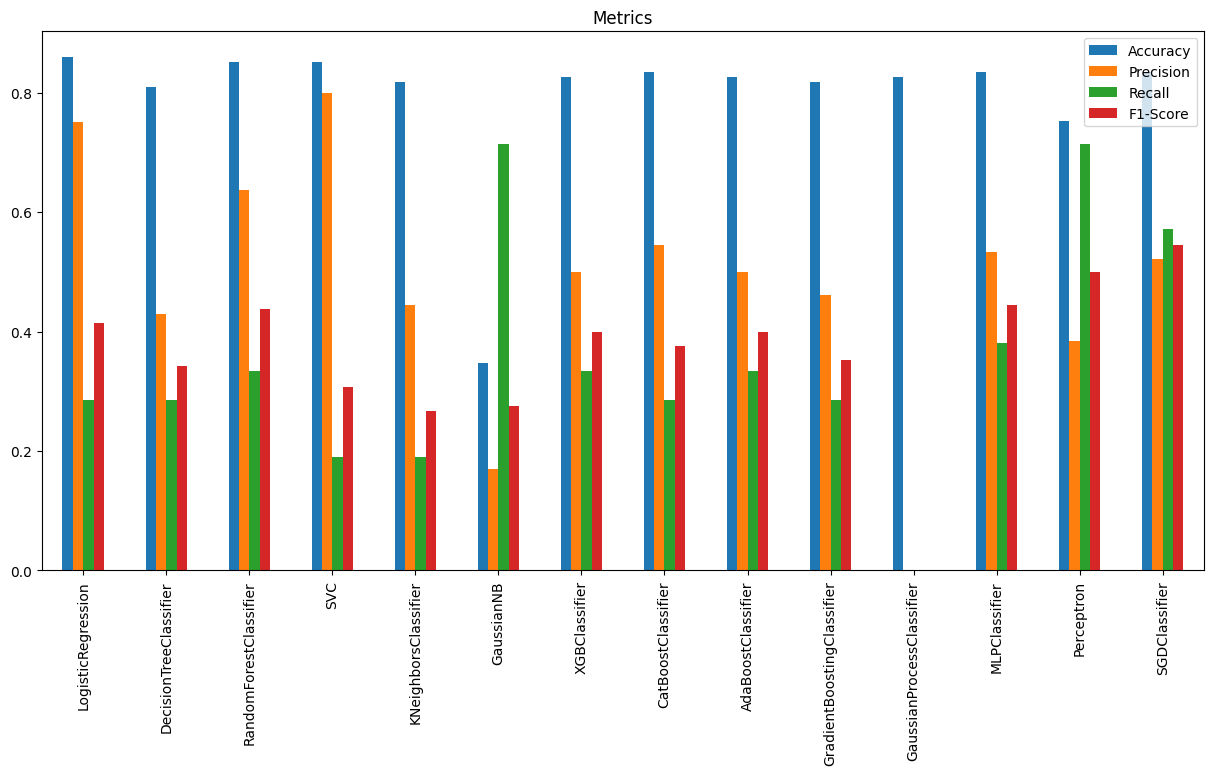

In [38]:
metrics_df = pd.DataFrame(metrics_count, columns=metrics, index=[list(classifier.keys())[0] for classifier in classifiers])
metrics_df.plot.bar(figsize=(15, 7))
plt.title('Metrics')
plt.show()


In [39]:
metrics_df

,Accuracy,Precision,Recall,F1-Score
LogisticRegression,0.859504,0.750000,0.285714,0.413793
DecisionTreeClassifier,0.809917,0.428571,0.285714,0.342857
RandomForestClassifier,0.851240,0.636364,0.333333,0.437500
SVC,0.851240,0.800000,0.190476,0.307692
KNeighborsClassifier,0.818182,0.444444,0.190476,0.266667
GaussianNB,0.347107,0.170455,0.714286,0.275229
XGBClassifier,0.826446,0.500000,0.333333,0.400000
CatBoostClassifier,0.834711,0.545455,0.285714,0.375000
AdaBoostClassifier,0.826446,0.500000,0.333333,0.400000
GradientBoostingClassifier,0.818182,0.461538,0.285714,0.352941


### ROC curve

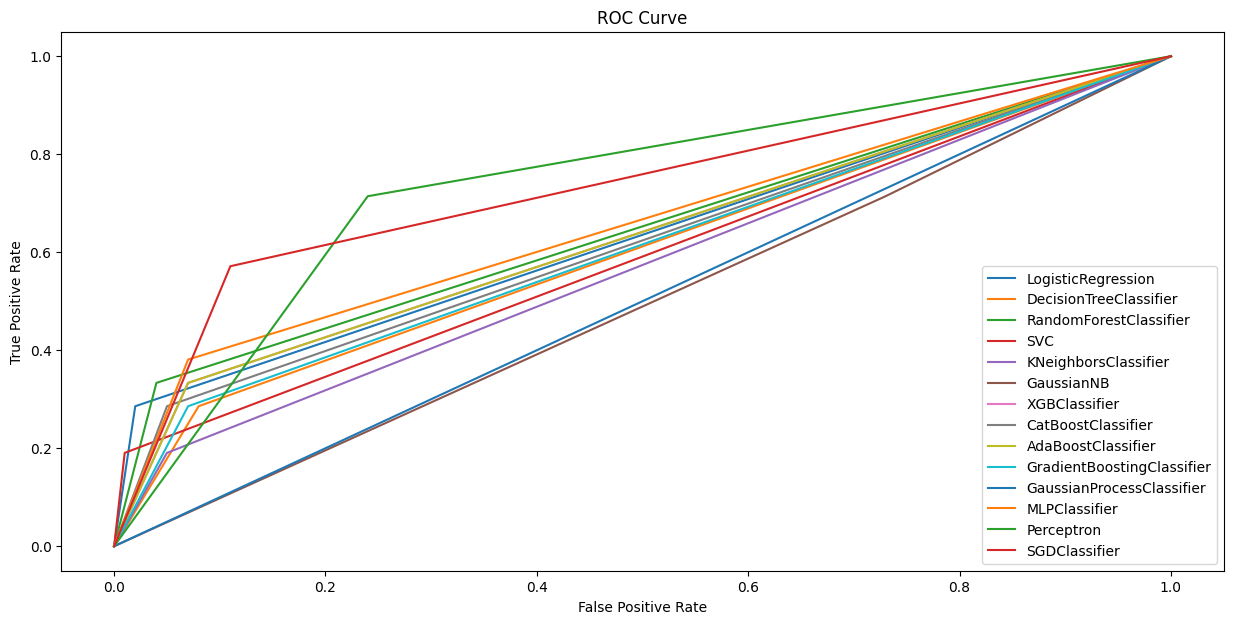

In [40]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(15, 7))
for classifier in classifiers:
    fpr, tpr, _ = roc_curve(y_test, classifier['y'])
    plt.plot(fpr, tpr, label=list(classifier.keys())[0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
plt.show()